# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file_path = './Online Retail.xlsx'
file_path = './Online Retail.csv'

if os.path.exists(file_path):
    # df = pd.read_excel(file_path, index_col=0)
    df = pd.read_csv(file_path)
else:
    print(f"File not found: {file_path}")


## Task 2: Perform data cleaning

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# List of columns to drop
columns_to_drop = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df.head())

   Quantity          InvoiceDate  UnitPrice         Country
0         6  2010-12-01 08:26:00       2.55  United Kingdom
1         6  2010-12-01 08:26:00       3.39  United Kingdom
2         8  2010-12-01 08:26:00       2.75  United Kingdom
3         6  2010-12-01 08:26:00       3.39  United Kingdom
4         6  2010-12-01 08:26:00       3.39  United Kingdom


In [5]:
df.isnull().sum()

Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (239796, 4)


In [8]:
df = df.drop_duplicates()

In [9]:
df.head()

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
5,2,2010-12-01 08:26:00,7.65,United Kingdom
6,6,2010-12-01 08:26:00,4.25,United Kingdom


In [10]:
# df.to_csv('Online_Retail_Cleaned.csv')

### Task 3: Explore basic statistics of the dataset

In [11]:
df

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
5,2,2010-12-01 08:26:00,7.65,United Kingdom
6,6,2010-12-01 08:26:00,4.25,United Kingdom
...,...,...,...,...
541901,8,2011-12-09 12:50:00,1.95,France
541903,4,2011-12-09 12:50:00,4.15,France
541904,12,2011-12-09 12:50:00,0.85,France
541905,6,2011-12-09 12:50:00,2.10,France


In [12]:
df.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'Country'], dtype='object')

In [13]:
df.count()

Quantity       302113
InvoiceDate    302113
UnitPrice      302113
Country        302113
dtype: int64

In [14]:
df.shape

(302113, 4)

#### checking the type of data

In [15]:
df.dtypes

Quantity         int64
InvoiceDate     object
UnitPrice      float64
Country         object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302113 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     302113 non-null  int64  
 1   InvoiceDate  302113 non-null  object 
 2   UnitPrice    302113 non-null  float64
 3   Country      302113 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ MB


In [17]:
df.describe()

,Quantity,UnitPrice
count,302113.000000,302113.000000
mean,11.850960,5.926469
std,291.001023,129.547795
min,-80995.000000,-11062.060000
25%,2.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,4.250000
max,80995.000000,38970.000000


In [18]:
print("\nTask 3: Exploring basic statistics of the dataset")

# Select only numeric columns for central tendency and dispersion calculations
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


# Measures of central tendency (mean, median, mode)
central_tendency_mean = df[numeric_columns].mean()  
central_tendency_median = df[numeric_columns].median()  
central_tendency_mode = df[numeric_columns].mode().iloc[0]  # Use .iloc[0] to handle cases with multiple modes

# Measures of dispersion (standard deviation, range)
dispersion = df[numeric_columns].std()  # You can also use df_cleaned.max() - df_cleaned.min()

# Display the results
print("Measures of Central Tendency (Mean):")
print(central_tendency_mean)

print("\nMeasures of Central Tendency (Median):")
print(central_tendency_median)

print("\nMeasures of Central Tendency (Mode):")
print(central_tendency_mode)

print("\nMeasures of Dispersion (Standard Deviation):")
print(dispersion)

# Calculate correlations
print("\nCalculating Correlations")
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Task 3: Exploring basic statistics of the dataset
Measures of Central Tendency (Mean):
Quantity     11.850960
UnitPrice     5.926469
dtype: float64

Measures of Central Tendency (Median):
Quantity     4.0
UnitPrice    2.1
dtype: float64

Measures of Central Tendency (Mode):
Quantity     1.00
UnitPrice    1.25
Name: 0, dtype: float64

Measures of Dispersion (Standard Deviation):
Quantity     291.001023
UnitPrice    129.547795
dtype: float64

Calculating Correlations
Correlation Matrix:
           Quantity  UnitPrice
Quantity    1.00000   -0.00125
UnitPrice  -0.00125    1.00000


## Step 4: Data Visualization

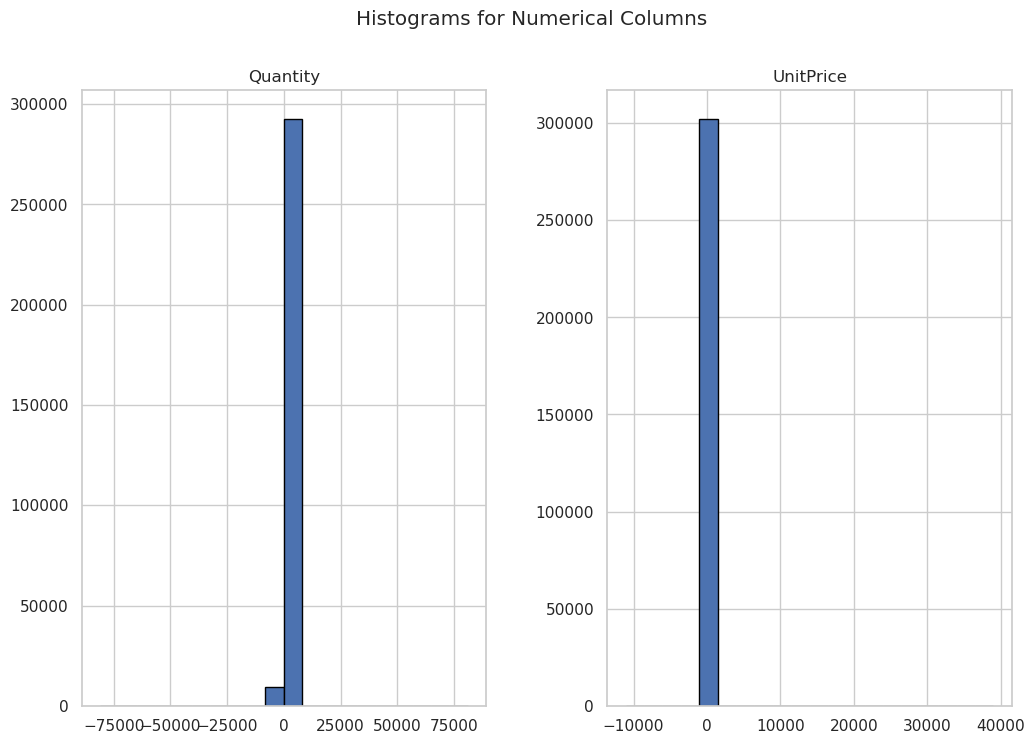

In [19]:
# Step 4: Data Visualization
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms for Numerical Columns")
plt.show()

In [20]:
# Plot a pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairplot for Numerical Columns")
plt.show()

/home/archie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
# Plot a heatmap for the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Plot bar plots or count plots for categorical columns (e.g., 'Country')
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df, palette="viridis")
    plt.title(f"Count Plot for {column}")
    plt.show()

### Task 5: Analysis

In [ ]:
# Step 6: Analyze Sales Trends over Time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Online_Retail_Cleaned.csv')

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new columns for month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Plot monthly sales trends
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period("M")).sum()['Quantity']
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Plot day-wise sales trends
daywise_sales = df.groupby('DayOfWeek').sum()['Quantity']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(x=daywise_sales.index, y=daywise_sales.values, order=days_order, palette='viridis')
plt.title('Day-wise Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.show()

# Identify busiest month and day of the week
busiest_month = monthly_sales.idxmax().strftime('%B %Y')
busiest_day = daywise_sales.idxmax()

print(f"The busiest month in terms of sales is: {busiest_month}")
print(f"The busiest day of the week in terms of sales is: {busiest_day}")
